In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock=pd.read_csv(r'C:\Users\SAURABH UPADHYAY\Company Stock and Investment.csv')
stock.head(7)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041


In [3]:
stock.shape

(1984, 5)

***`Here we are going to predict the stock and  investment of the company in 'OIL'`***

In [4]:
oil=stock.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1)
oil.head(7)

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
5,08-01-2010,0.001269
6,11-01-2010,-0.002417


In [5]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1984 non-null   object 
 1   Oil Investments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [6]:
oil['Date']=pd.to_datetime(oil['Date'])
oil.head(12)
#it is in yyyy-mm-dd format so we have all monthly data

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256
5,2010-08-01,0.001269
6,2010-11-01,-0.002417
7,2010-12-01,-0.021202
8,2010-01-13,-0.013987
9,2010-01-14,-0.003892


In [7]:
oil.set_index('Date', inplace=True)

In [8]:
oil=oil.resample('MS').sum()

In [9]:
oil.reset_index(inplace=True)
oil.head(5)

,Date,Oil Investments
0,2009-12-01,0.025417
1,2010-01-01,-0.029126
2,2010-02-01,0.184326
3,2010-03-01,0.095769
4,2010-04-01,-0.067218


In [10]:
oil.describe()

,Oil Investments
count,97.000000
mean,-0.008899
std,0.125303
min,-0.953182
25%,-0.037497
50%,-0.000692
75%,0.045461
max,0.248424


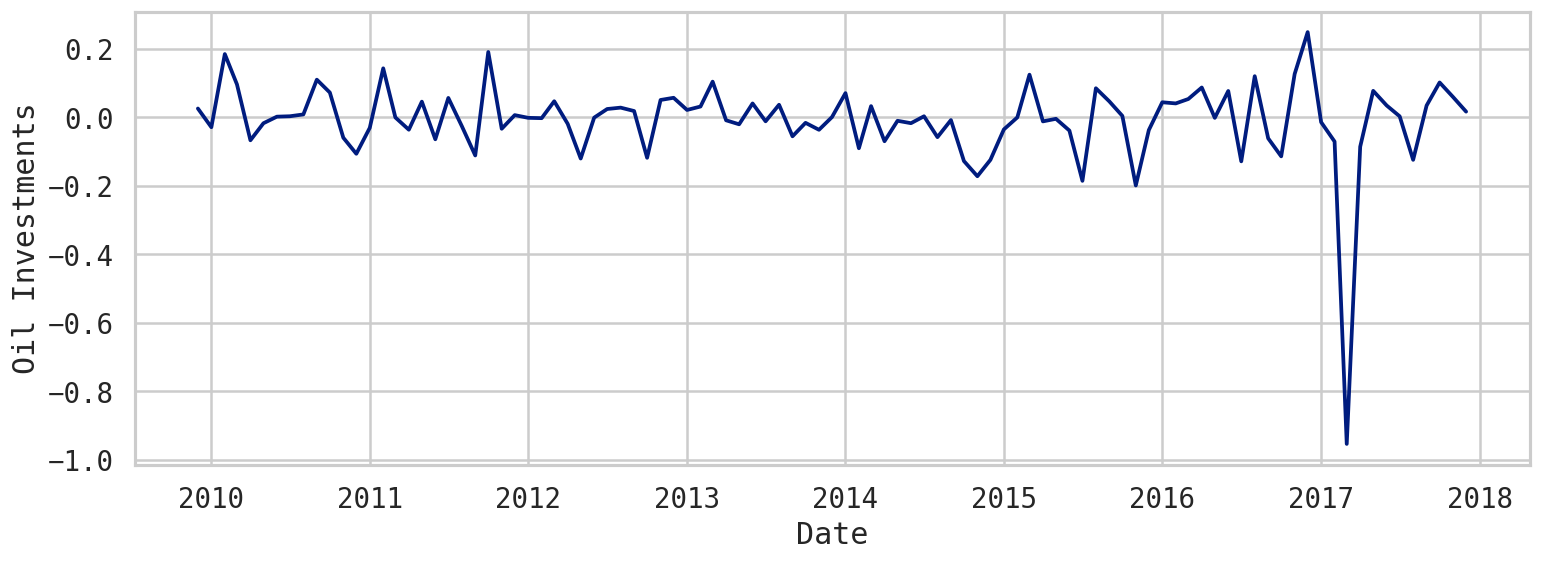

In [11]:
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(15,5),dpi=120)
sns.lineplot(x='Date',y='Oil Investments',data=oil,dashes=True,markers='2',estimator=None,ci=55,err_style='band')
plt.show()

In [12]:
def adf(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations']
    for i in range(len(labels)):
        print(labels[i],' = ', result[i])
    if result[1]>0.05:
        print('The',labels[1],' is higher than 0.05 and it strongly support Null hypothesis that the data is non stationary')
    else:
         print('\nThe',labels[1],' is less than 0.05 and it strongly rejects Null hypothesis and hold the alternate hypothesis which says that the data is stationary')

In [13]:
adf(oil['Oil Investments'])

ADF Test Statistic  =  -7.126902702274783
p-value  =  3.6005710703274825e-10
Lags Used  =  2
Number of Observations  =  94

The p-value  is less than 0.05 and it strongly rejects Null hypothesis and hold the alternate hypothesis which says that the data is stationary


***`So from the graph and ADF test it's clear that the p value is higher than 0.05 which lead to drooping null hypothesis`***

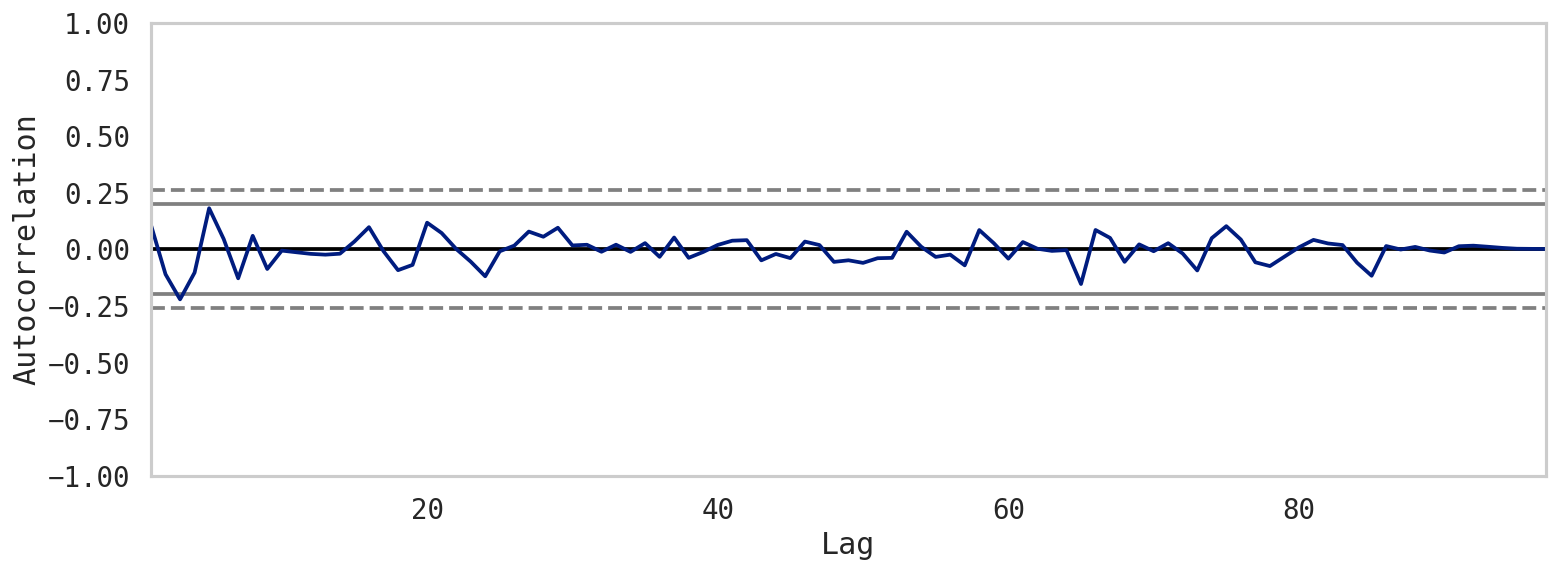

In [14]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
autocorrelation_plot(oil['Oil Investments'])
plt.show()

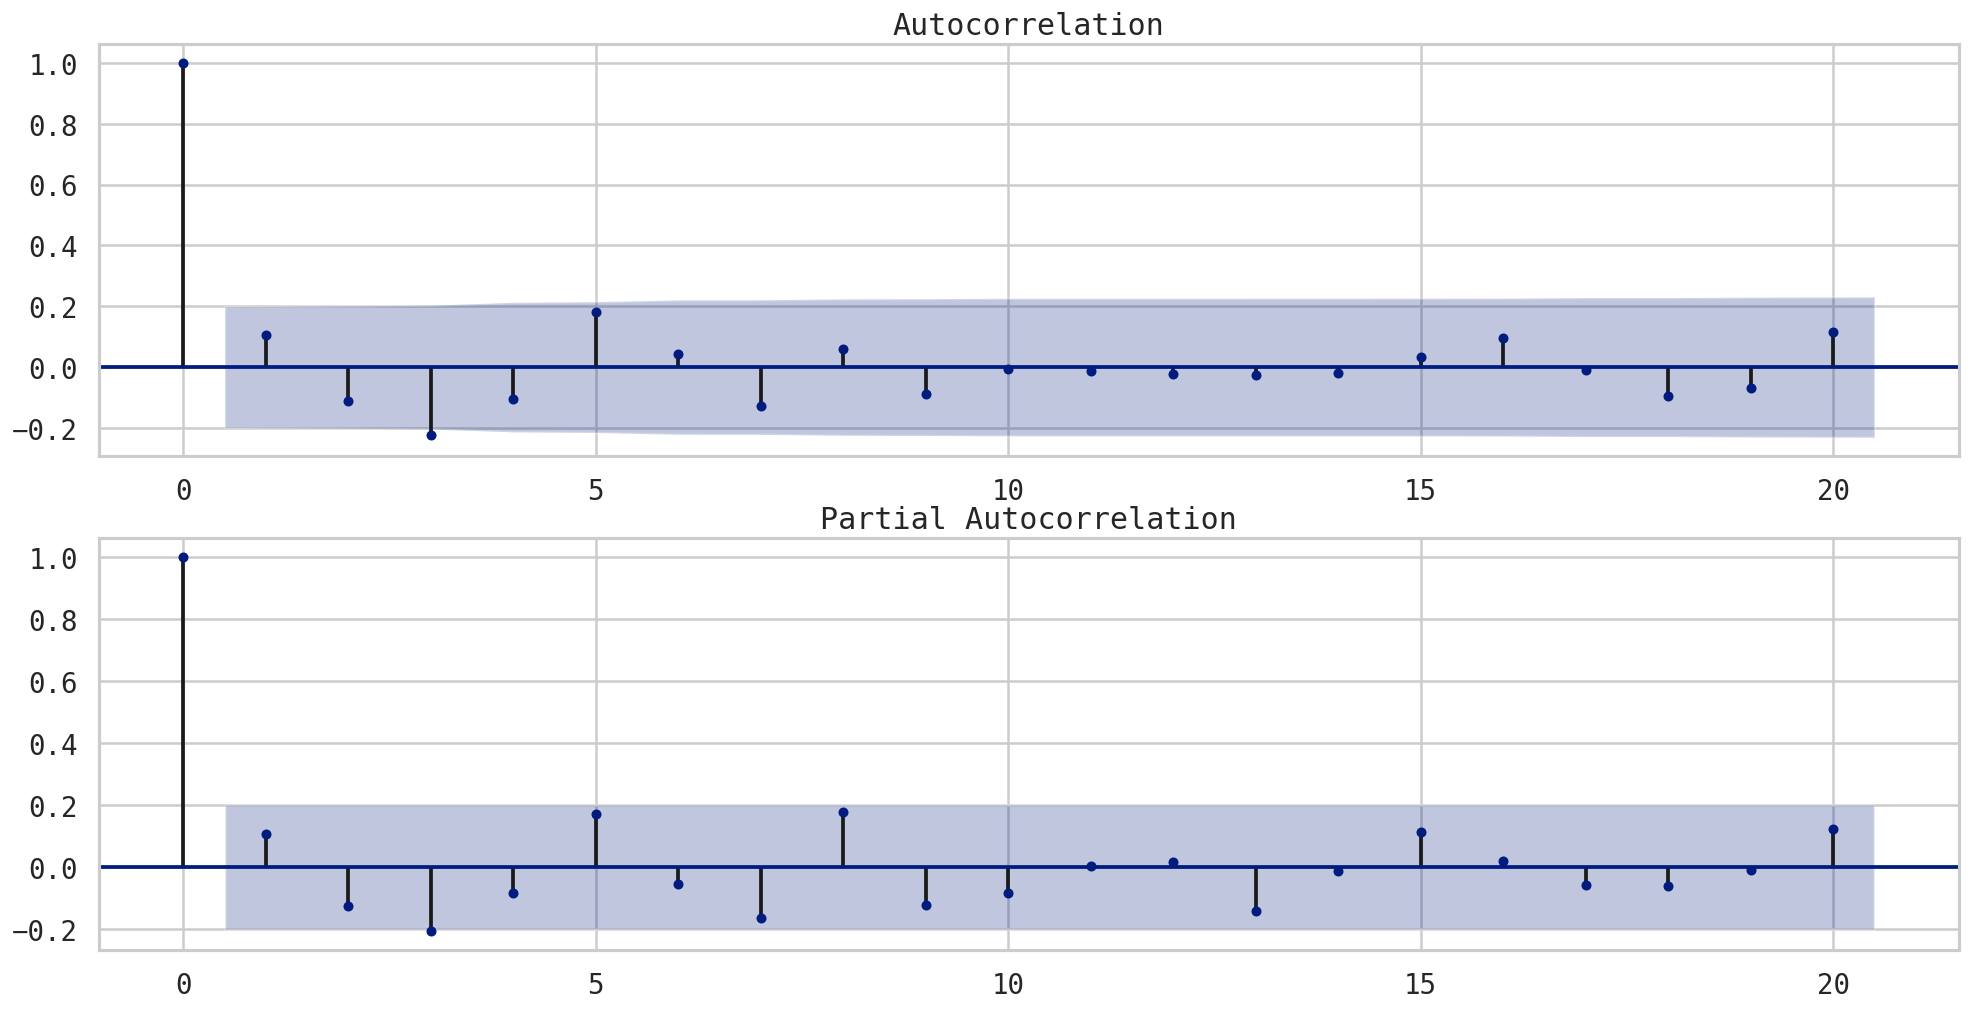

In [15]:
fig=plt.figure(figsize=(20,10),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(oil['Oil Investments'],lags=20,ax=ax1)   #to determine AR value
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(oil['Oil Investments'],lags=20,ax=ax2) # to determine MA value
plt.tight_layout
plt.show()

In [16]:
model=sm.tsa.statespace.SARIMAX(oil['Oil Investments'],order=(5,1,8),seasonal_order=(5,1,8,12))
results=model.fit()

In [17]:
oil['forecast']=results.predict(start=50,end=97,dynamic=True)

In [18]:
oil

,Date,Oil Investments,forecast
0,2009-12-01,0.025417,NaN
1,2010-01-01,-0.029126,NaN
2,2010-02-01,0.184326,NaN
3,2010-03-01,0.095769,NaN
4,2010-04-01,-0.067218,NaN
...,...,...,...
92,2017-08-01,-0.124324,-0.036026
93,2017-09-01,0.034083,-0.024945
94,2017-10-01,0.101426,0.020730
95,2017-11-01,0.058930,-0.043756


**FORECASTING FOR NEXT 4 YEARS THAT IS 2018 TO 2021**

In [19]:
oil.set_index('Date', inplace=True)

In [20]:
future_dates=[oil.index[-1]+ DateOffset(months=x)for x in range(0,49)]

In [21]:
future=pd.DataFrame(index=future_dates[1:],columns=oil.columns)

In [22]:
future.head(5)

,Oil Investments,forecast
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN


In [23]:
future.tail(5)

,Oil Investments,forecast
2021-08-01,NaN,NaN
2021-09-01,NaN,NaN
2021-10-01,NaN,NaN
2021-11-01,NaN,NaN
2021-12-01,NaN,NaN


In [24]:
df=pd.concat([oil,future])
df.reset_index(inplace=True)

In [25]:
df['forecast'] = results.predict(start = 97, end = 144, dynamic= True)  
df

,index,Oil Investments,forecast
0,2009-12-01,0.025417,NaN
1,2010-01-01,-0.029126,NaN
2,2010-02-01,0.184326,NaN
3,2010-03-01,0.095769,NaN
4,2010-04-01,-0.067218,NaN
...,...,...,...
140,2021-08-01,NaN,-0.054318
141,2021-09-01,NaN,-0.050589
142,2021-10-01,NaN,-0.008716
143,2021-11-01,NaN,-0.065790


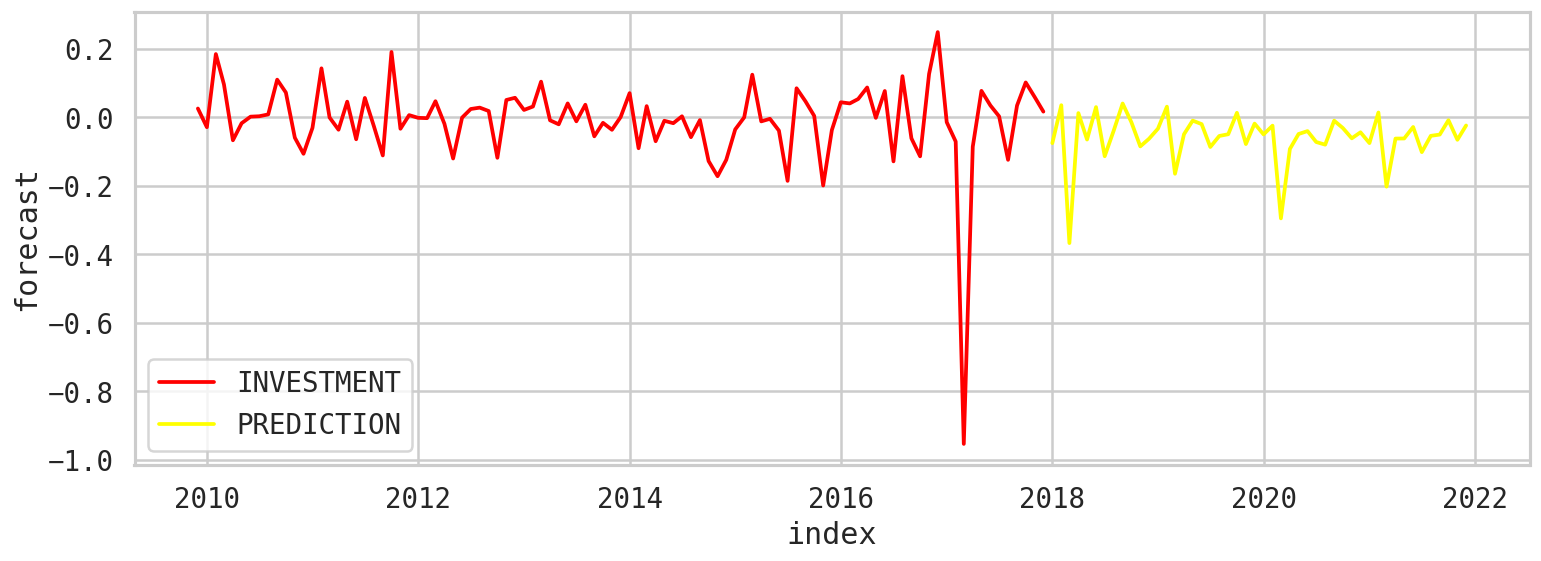

In [26]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
l1=sns.lineplot(x='index',y='Oil Investments',data=df,label="INVESTMENT",color='red')
l2=sns.lineplot(x='index',y='forecast',data=df,label="PREDICTION",color='yellow')